# Trabalho Final - Modelos de IA e Machine Learning

### Integrantes:

###    1) Jurandir Ventura - RM336634
###    2) Marcelo Preto - RM336632
###    3) Fabio Rizzi - RM336656
###    4) Thiago Alexandre – RM336583

# Exercício 5.2

Utilizando o dataset Pulsar Star ( disponível no repositório da disciplina) construa um classificador SVM que classifique as amostras em estrelas de nêutrons ou não.
Avalie a precisão, acurácia e varie o tipo de kernel e parâmetro C para este problema. ( GridSearch é opcional mas recomendável).

Qual foi a melhor configuração que você encontrou?

Dica:
* Observe a matriz de confusão para verificar se o classificar está conseguindo classificar dados das duas classes;
* Normalize os dados;

In [1]:
#Importando as bibliotecas. Se houver algum erro, use "pip install Libname"
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn import svm
from sklearn.pipeline import Pipeline
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
#Leitura do dataset .csv

#Lembrar que a origem da dataset é uma variável. Neste caso usei um diretório local.
dataset = pd.read_csv('data/5.2_pulsar_stars.csv')
dataset.head()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [3]:
# Analisando o tamanho do dataset
dataset.shape

(17898, 9)

In [4]:
# Visão geral dos dados (com DataType)

dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0    Mean of the integrated profile                17898 non-null  float64
 1    Standard deviation of the integrated profile  17898 non-null  float64
 2    Excess kurtosis of the integrated profile     17898 non-null  float64
 3    Skewness of the integrated profile            17898 non-null  float64
 4    Mean of the DM-SNR curve                      17898 non-null  float64
 5    Standard deviation of the DM-SNR curve        17898 non-null  float64
 6    Excess kurtosis of the DM-SNR curve           17898 non-null  float64
 7    Skewness of the DM-SNR curve                  17898 non-null  float64
 8   target_class                                   17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [5]:
# Verificaçõ se tem dados nulos

dataset.isnull().sum()

 Mean of the integrated profile                  0
 Standard deviation of the integrated profile    0
 Excess kurtosis of the integrated profile       0
 Skewness of the integrated profile              0
 Mean of the DM-SNR curve                        0
 Standard deviation of the DM-SNR curve          0
 Excess kurtosis of the DM-SNR curve             0
 Skewness of the DM-SNR curve                    0
target_class                                     0
dtype: int64

## Nenhum dado nulo e todos são do tipo numérico (float64 e int64)

In [6]:
# Decrição estatísticas do Dataset

dataset.describe()

,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309331,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392140,110.642211,34.539844,1191.000837,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000278D9DE22C8>,
      dtype=object)

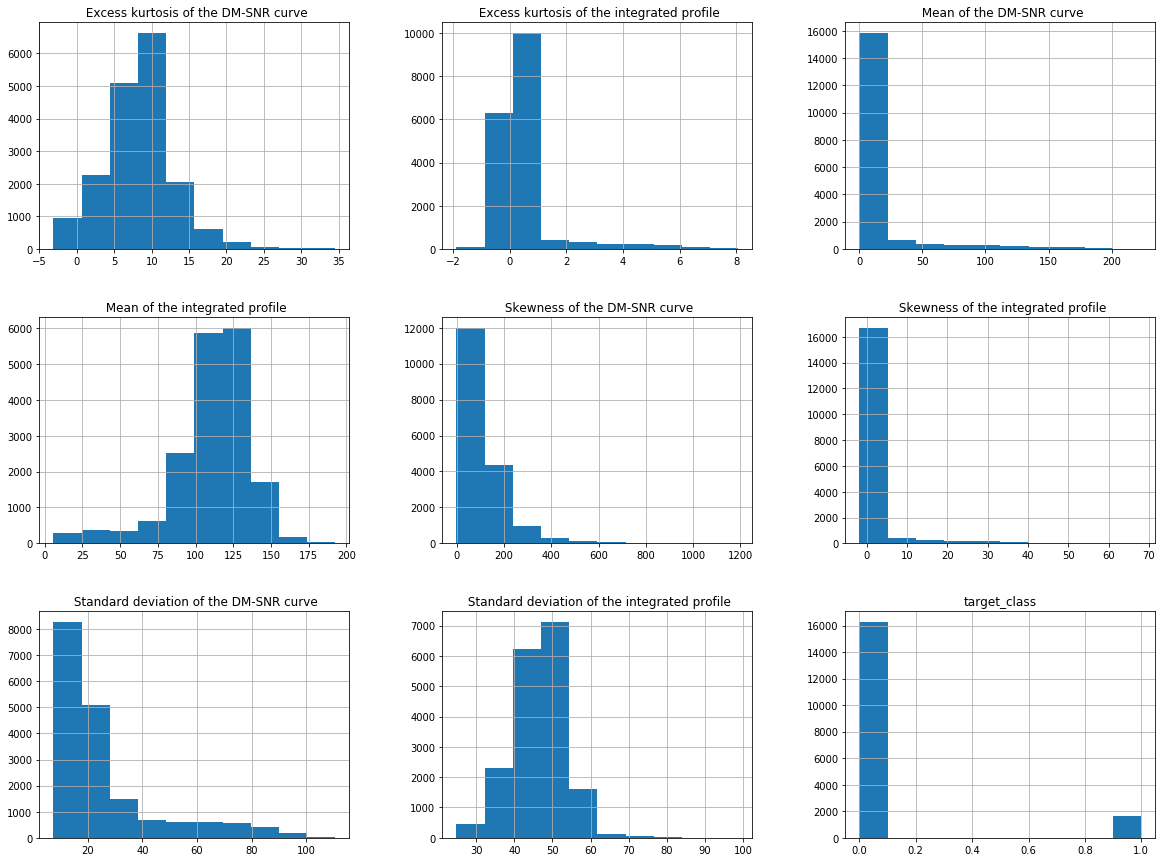

In [7]:
# Histograma do Dataset

dataset.hist(figsize=(20,15))

### Como podemos observar nos gráficos acima, as características "Mean of the DM-SNR curve" e "Skewness of the integrated profile" estão desbalanceadas e possuem uma alta concentração com pouca variação.

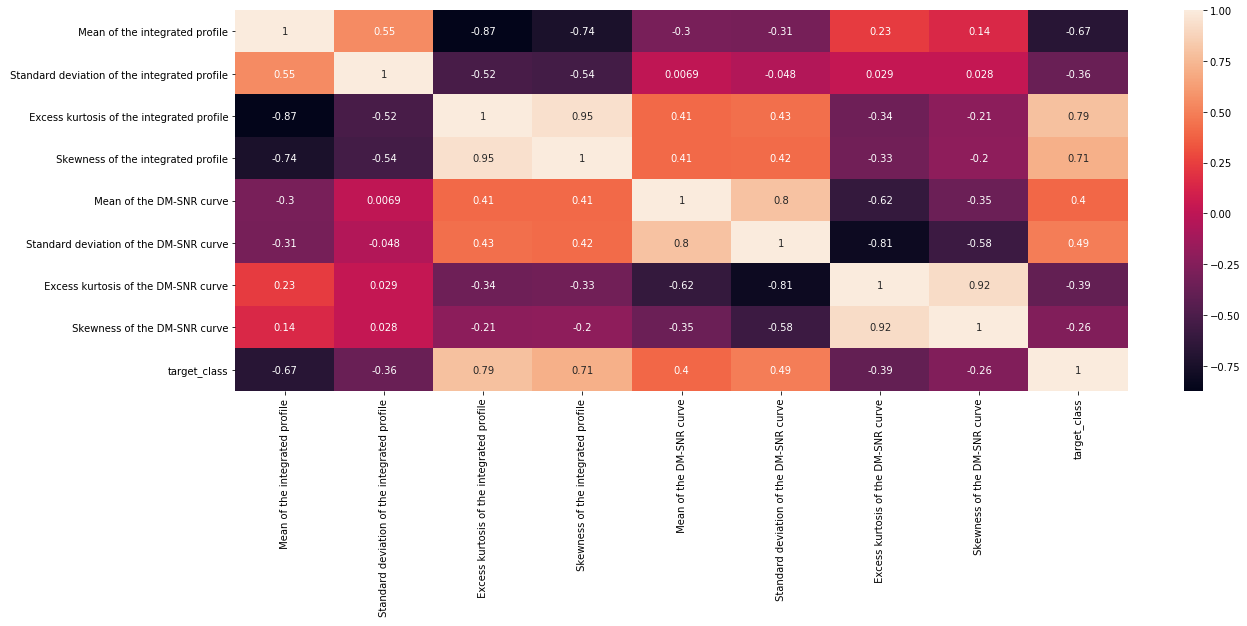

In [8]:
# Analisando as correlações

plt.figure(figsize=(20,7))
sb.heatmap(dataset.corr(), annot = True)

## 'Skewness of the integrated profile' e 'Excess kurtosis of the integrated profile' apresentam forte correlação 0,95 e 'Skewness of the DM-SNR curve' e 'Excess kurtosis of the DM-SNR curve' de 0,92.

In [9]:
# Retirando 'Skewness of the integrated profile' e 'Skewness of the DM-SNR curve' do nosso dataset.

dataset.drop([' Skewness of the DM-SNR curve',' Skewness of the integrated profile'], axis = 1, inplace = True)

### Separamos a variável alvo e as características:

In [10]:
X = dataset.drop(['target_class'], axis = 1)
y = dataset['target_class']

## Criamos os pipelines para execução do classificador para cada tipo de Kernel e normalização.

In [11]:
pip_1 = Pipeline([
    ('min_max_scaler', MinMaxScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_2 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='rbf'))
])

pip_3 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='poly'))
])

pip_4 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear'))
])

arr_pipelines = [pip_1, pip_2, pip_3, pip_4]

## Executamos o cross-validation de cada um deles e verificamos qual possui a maior acurácia e precisão.

In [12]:
for pip in arr_pipelines:
    resultados = cross_val_predict(pip, X, y, cv=5)
    print(metrics.accuracy_score(y,resultados))
    print(metrics.classification_report(y,resultados,target_names=['0','1']))

0.9774835177114761
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16259
           1       0.94      0.81      0.87      1639

    accuracy                           0.98     17898
   macro avg       0.96      0.90      0.93     17898
weighted avg       0.98      0.98      0.98     17898

0.9776511342049391
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16259
           1       0.93      0.81      0.87      1639

    accuracy                           0.98     17898
   macro avg       0.96      0.90      0.93     17898
weighted avg       0.98      0.98      0.98     17898

0.9758632249413343
              precision    recall  f1-score   support

           0       0.98      0.99      0.99     16259
           1       0.94      0.79      0.86      1639

    accuracy                           0.98     17898
   macro avg       0.96      0.89      0.92     17898
weighted avg     

## A melhor acurácia e precisão é do kernel Linear com StandardScaler. Próximo passo é utilizarmos o GridSearch para encontrarmos a melhor configuração de parâmetros para esse classificador.

In [13]:
lista_C = [0.001, 0.01, 0.1, 1, 10, 100]
lista_gamma = [0.001, 0.01, 0.1, 1, 10, 100]

param_grid = dict(clf__C=lista_C, clf__gamma=lista_gamma)

grid = GridSearchCV(pip_4, param_grid, cv=5, scoring='accuracy', verbose = 1)

grid.fit(X,y)

print("Melhor C / Gamma ==> {}".format(grid.best_params_))
print("Melhor Acurácia ==> {}".format(grid.best_score_))

Fitting 5 folds for each of 36 candidates, totalling 180 fits
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed:  5.4min finished
Melhor C / Gamma ==> {'clf__C': 10, 'clf__gamma': 0.001}
Melhor Acurácia ==> 0.978209777394828


## A melhor acurácia foi de 0,9782. Ou seja, nesse caso, foi praticamente a mesma da execução sem fitting que foi de 0,9780 (pip_4). O melhor C foi 10 e o melhor gamma 0,001.

In [14]:
#Agora vamos executar o classificador com esses parâmetros acima.

pip_5 = Pipeline([
    ('scaler',StandardScaler()),
    ('clf', svm.SVC(kernel='linear',C=10,gamma=0.001))
])

resultados = cross_val_predict(pip_5, X, y, cv=5)
print(metrics.accuracy_score(y,resultados))
print(metrics.classification_report(y,resultados,target_names=['0','1']))

0.9782098558498156
              precision    recall  f1-score   support

           0       0.98      1.00      0.99     16259
           1       0.94      0.81      0.87      1639

    accuracy                           0.98     17898
   macro avg       0.96      0.90      0.93     17898
weighted avg       0.98      0.98      0.98     17898



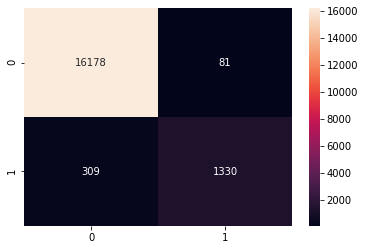

In [15]:
# Matriz de confusão

sb.heatmap(metrics.confusion_matrix(y, resultados), annot = True, fmt = "d")

## O classificador consegue classificar dados das 2 classes, mas tem erro maior para a classe 1. É possível ver um desbalanceamento pelo histograma, pois o dataset possui muito mais dados da classe "0" do que "1".